# Bit about GloVe

- GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space, more at https://nlp.stanford.edu/projects/glove/

- This notebook assumes that you have already downloaded one of the GloVe word embeddings file. If not then please do so

In [2]:
from gensim.scripts.glove2word2vec import glove2word2vec

#load the GloVe word embeddings file which has a 100 dimension representation for each word. Convert that into a word2vec supported format
glove2word2vec('glove.6B.100d.txt','word2vec.glove.6B.100d.txt')

(400000, 100)

In [3]:
from gensim.models import KeyedVectors

# load the wordvec file
model = KeyedVectors.load_word2vec_format('word2vec.glove.6B.100d.txt')

## Power of Word2Vec model using GloVe embeddings

    - Some really good examples available at https://radimrehurek.com/gensim/models/keyedvectors.html
    - You would need to do a pip install pyemd for wmdistance to work

In [4]:
# most similar words
print (model.most_similar(positive=['stock'], negative=['factory']))

[('treasuries', 0.5385321378707886), ('investors', 0.49317896366119385), ('equities', 0.48488757014274597), ('volatility', 0.4768450856208801), ('repurchases', 0.4751368761062622), ('capitalization', 0.4698612093925476), ('currencies', 0.4666273295879364), ('bond', 0.4662191867828369), ('oversubscribed', 0.46529191732406616), ('nyse', 0.4631817042827606)]


In [5]:
print (model.most_similar(['cat']))

[('dog', 0.8798074722290039), ('rabbit', 0.7424427270889282), ('cats', 0.7323004007339478), ('monkey', 0.7288710474967957), ('pet', 0.7190139293670654), ('dogs', 0.7163873314857483), ('mouse', 0.6915251016616821), ('puppy', 0.6800068616867065), ('rat', 0.6641027331352234), ('spider', 0.6501134634017944)]


In [6]:
print (model.most_similar(['equity'], topn=5))

[('investment', 0.7512970566749573), ('investments', 0.7315619587898254), ('asset', 0.7261636257171631), ('equities', 0.6976175308227539), ('securities', 0.6831409931182861)]


## Visualize embeddings using PCA

    - In this particular GloVe word embedding there are some 400k words with 100 dimensional embedding. We will select just 50 words and try to visualize them after doing a dimension reduction via PCA

C:\MachineLearning\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


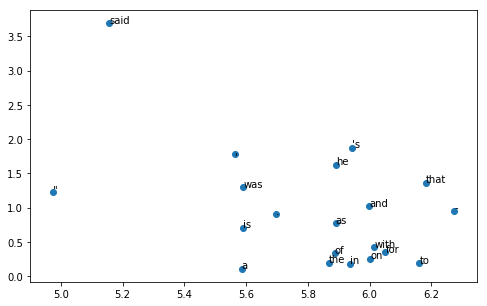

In [8]:
vocab = model.wv.vocab
words = []
for i, word in enumerate(vocab):
    words.append(word)

X = model[vocab]

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

z = PCA(n_components=2)
pca_model = z.fit(X)
components = pca_model.transform(X)

num_words_to_show=20

plt.figure(figsize=(8,5))
plt.scatter(components[0:num_words_to_show,0],components[0:num_words_to_show,1])
for i in range(0, num_words_to_show):
    plt.annotate(words[i], xy=(components[i,0],components[i,1]))
plt.show()